In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.datasets import cifar10
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
y_train = np.where(y_train== 5,1,0)
y_test = np.where(y_test== 5,1,0)

In [ ]:
X_traain = X_train/255.0
X_test = X_test/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3,),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #for binary output

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer ='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(X_traain, y_train, epochs=5, batch_size=64)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9254 - loss: 0.1916
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9299 - loss: 0.1807
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9356 - loss: 0.1667
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.9398 - loss: 0.1569
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.9440 - loss: 0.1475


In [ ]:
loss, accuracy=model.evaluate(X_test,y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9190 - loss: 0.2066
Test Accuracy: 0.9207000136375427


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


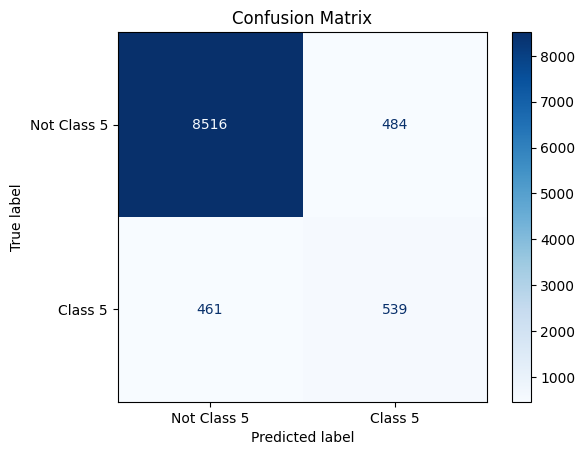

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Not Class 5", "Class 5"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

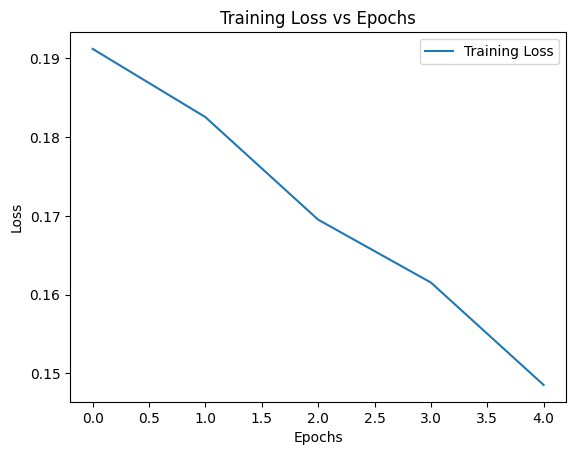

In [ ]:
history_dict = model.history.history
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()

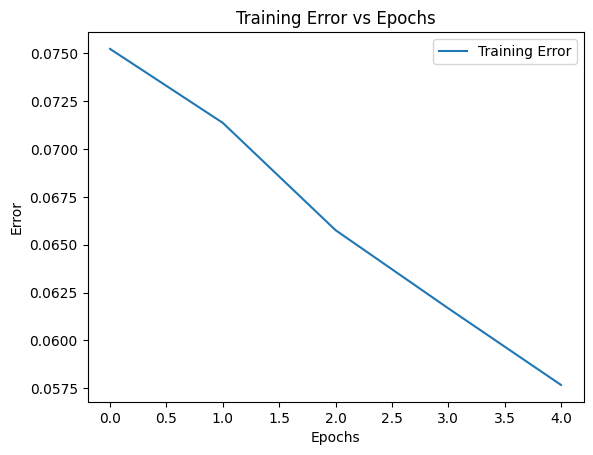

In [ ]:
history_dict = model.history.history

training_error = [1 - acc for acc in history_dict['accuracy']]

plt.figure()
plt.plot(training_error, label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error vs Epochs')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.layers import Dropout
tuned_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
tuned_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
tuned_history = tuned_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 71ms/step - accuracy: 0.8813 - loss: 1.0469 - val_accuracy: 0.8977 - val_loss: 0.2925
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.9076 - loss: 0.2522 - val_accuracy: 0.9070 - val_loss: 0.2407
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.9127 - loss: 0.2311 - val_accuracy: 0.9125 - val_loss: 0.2210
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - accuracy: 0.9143 - loss: 0.2253 - val_accuracy: 0.9112 - val_loss: 0.2261
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 81ms/step - accuracy: 0.9175 - loss: 0.2192 - val_accuracy: 0.9096 - val_loss: 0.2359
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 70ms/step - accuracy: 0.9201 - loss: 0.2105 - val_accuracy: 0.9102 - val_loss: 0.2324
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 71ms/step - accuracy: 0.9212 - loss: 0.2056 - val_accuracy: 0.9160 - val_loss: 0.2171
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 69ms/step - accuracy: 0.9260 - loss: 0.1931 - 

In [ ]:
loss, accuracy = tuned_model.evaluate(X_test, y_test)
print("Tuned Model Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9025 - loss: 0.3849
Tuned Model Test Accuracy: 0.8999999761581421
